In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('cleanedDf.csv')
df

,truck_id,route_id,departure_date,estimated_arrival,delay,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,driver_id,...,city_chanceofrain_y,city_chanceoffog_y,city_chanceofsnow_y,city_chanceofthunder_y,combined_datetime_x,date,hour,no_of_vehicles,accident,combined_datetime_y
0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:00:00,0,9.0,3000.0,23.0,diesel,94ed3e6d-f,...,0,0,0,0,2019-01-01 13:00:00,2019-01-01,700,1966.000000,0.0,2019-01-01 07:00:00
1,16793343,R-1a802b07,2019-01-01 07:00:00,2019-01-05 17:00:00,1,10.0,15000.0,27.0,diesel,0257f2f2-c,...,0,0,0,0,2019-01-05 17:00:00,2019-01-01,700,1941.008411,0.0,2019-01-01 07:00:00
2,16301082,R-d377c549,2019-01-01 07:00:00,2019-01-05 23:00:00,0,11.0,20000.0,26.0,diesel,b38a38cb-a,...,0,0,0,0,2019-01-05 23:00:00,2019-01-01,700,1941.008411,0.0,2019-01-01 07:00:00
3,20996187,R-113cebab,2019-01-01 07:00:00,2019-01-05 23:00:00,0,8.0,4000.0,28.0,diesel,ce75c223-e,...,0,0,0,0,2019-01-05 23:00:00,2019-01-01,700,1941.008411,0.0,2019-01-01 07:00:00
4,27204262,R-9f601372,2019-01-01 07:00:00,2019-01-06 21:00:00,0,12.0,15000.0,23.0,diesel,f763b55e-0,...,0,0,0,0,2019-01-06 21:00:00,2019-01-01,700,1941.008411,0.0,2019-01-01 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12602,16311717,R-0800a595,2019-02-12 07:00:00,2019-02-13 06:00:00,0,8.0,3000.0,24.0,diesel,664895ce-d,...,0,0,0,0,2019-02-13 06:00:00,2019-02-12,700,1999.000000,0.0,2019-02-12 07:00:00
12603,20724268,R-3dac8163,2019-02-12 07:00:00,2019-02-12 21:00:00,1,8.0,15000.0,24.0,diesel,1fc1302f-9,...,0,0,0,0,2019-02-12 21:00:00,2019-02-12,700,1999.000000,0.0,2019-02-12 07:00:00
12604,21928760,R-5f7269e5,2019-02-12 07:00:00,2019-02-12 15:00:00,0,13.0,6000.0,17.0,gas,87a34a65-1,...,0,0,0,0,2019-02-12 15:00:00,2019-02-12,700,1999.000000,0.0,2019-02-12 07:00:00
12605,29839726,R-bfbffabd,2019-02-12 07:00:00,2019-02-12 09:00:00,0,10.0,20000.0,16.0,gas,163a3367-9,...,0,0,0,0,2019-02-12 09:00:00,2019-02-12,700,1999.000000,0.0,2019-02-12 07:00:00


In [5]:
#Get all columns of type 'object'
object_columns = df.select_dtypes(include='object').columns

print(object_columns)
df2 = df.copy()
df2 = df2.drop(columns=object_columns)
print(df2)
print(df2)


Index(['route_id', 'departure_date', 'estimated_arrival', 'fuel_type',
       'driver_id', 'name', 'gender', 'driving_style', 'origin_id',
       'destination_id', 'Date', 'description', 'city_city_id_x',
       'city_date_x', 'city_description_x', 'city_city_id_y', 'city_date_y',
       'city_description_y', 'combined_datetime_x', 'date',
       'combined_datetime_y'],
      dtype='object')
       truck_id  delay  truck_age  load_capacity_pounds  mileage_mpg   age  \
0      30312694      0        9.0                3000.0         23.0  48.0   
1      16793343      1       10.0               15000.0         27.0  45.0   
2      16301082      0       11.0               20000.0         26.0  50.0   
3      20996187      0        8.0                4000.0         28.0  53.0   
4      27204262      0       12.0               15000.0         23.0  52.0   
...         ...    ...        ...                   ...          ...   ...   
12602  16311717      0        8.0                3000.0    

In [6]:
df2.columns


Index(['truck_id', 'delay', 'truck_age', 'load_capacity_pounds', 'mileage_mpg',
       'age', 'experience', 'ratings', 'vehicle_no', 'average_speed_mph',
       'distance', 'average_hours', 'temp', 'wind_speed', 'precip', 'humidity',
       'visibility', 'pressure', 'chanceofrain', 'chanceoffog', 'chanceofsnow',
       'chanceofthunder', 'city_hour_x', 'city_temp_x', 'city_wind_speed_x',
       'city_precip_x', 'city_humidity_x', 'city_visibility_x',
       'city_pressure_x', 'city_chanceofrain_x', 'city_chanceoffog_x',
       'city_chanceofsnow_x', 'city_chanceofthunder_x', 'city_hour_y',
       'city_temp_y', 'city_wind_speed_y', 'city_precip_y', 'city_humidity_y',
       'city_visibility_y', 'city_pressure_y', 'city_chanceofrain_y',
       'city_chanceoffog_y', 'city_chanceofsnow_y', 'city_chanceofthunder_y',
       'hour', 'no_of_vehicles', 'accident'],
      dtype='object')

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Selecting features and target variable
X = df2.drop(columns=['delay'])  # Features (all except 'delay')
y = df2['delay']                 # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get the feature names (from X columns)
selected_features = X.columns

# Feature importance
importances = pd.DataFrame({'Feature': selected_features, 'Importance': model.feature_importances_})

# Print the importance sorted in descending order
print(importances.sort_values(by="Importance", ascending=False))



                   Feature  Importance
9                 distance    0.104222
10           average_hours    0.084626
37       city_visibility_y    0.061475
25         city_humidity_x    0.052112
22             city_temp_x    0.049429
33             city_temp_y    0.047504
36         city_humidity_y    0.046456
44          no_of_vehicles    0.043363
27         city_pressure_x    0.040770
38         city_pressure_y    0.038418
8        average_speed_mph    0.038073
14                humidity    0.036120
11                    temp    0.033865
23       city_wind_speed_x    0.031340
16                pressure    0.029136
34       city_wind_speed_y    0.028828
5               experience    0.027516
12              wind_speed    0.027450
4                      age    0.024527
3              mileage_mpg    0.024142
0                 truck_id    0.022384
7               vehicle_no    0.022027
1                truck_age    0.019896
32             city_hour_y    0.018536
6                  rating

In [8]:
zero_importance_features = importances[importances['Importance'] == 0]['Feature']
zero_importance_features

17              chanceofrain
18               chanceoffog
19              chanceofsnow
20           chanceofthunder
21               city_hour_x
28       city_chanceofrain_x
29        city_chanceoffog_x
30       city_chanceofsnow_x
31    city_chanceofthunder_x
39       city_chanceofrain_y
40        city_chanceoffog_y
41       city_chanceofsnow_y
42    city_chanceofthunder_y
43                      hour
Name: Feature, dtype: object

In [36]:
df = df.drop(columns=zero_importance_features)


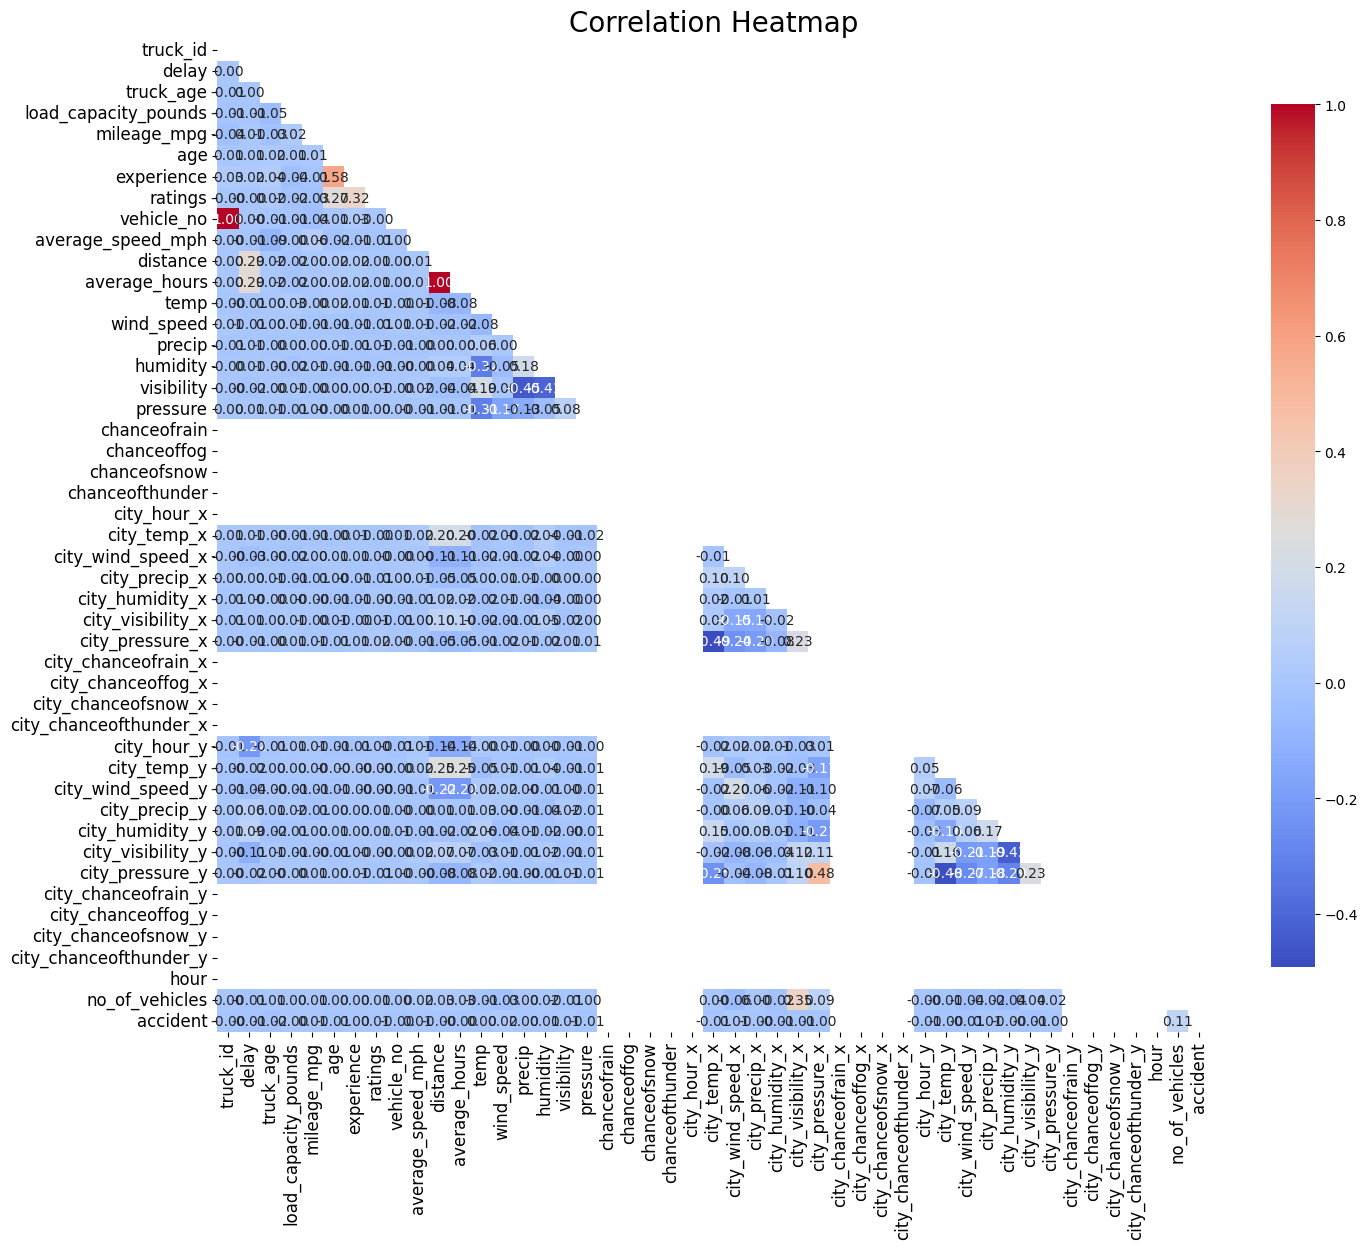

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame and 'target' is your target variable
# First, ensure you're focusing on numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Optionally, include the target variable in the correlation matrix
# correlation_matrix = df.corr()['target'].drop('target')

# Create a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(16, 14))  # Adjusting figure size

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, cbar_kws={"shrink": .8}, annot_kws={"size": 10})  # Increase annotation size

# Title and show the plot
plt.title('Correlation Heatmap', fontsize=20)  # Increase title font size
plt.xticks(fontsize=12)  # Increase x-axis label font size
plt.yticks(fontsize=12)  # Increase y-axis label font size
plt.show()


In [13]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Add 'delay' to the list of categorical columns if it's not already included
if 'delay' not in categorical_columns:
    categorical_columns.append('delay')

# Store results
chi_squared_results = {}

# Perform Chi-squared test for each categorical variable against 'delay'
for col in categorical_columns:
    if col != 'delay':
        contingency_table = pd.crosstab(df[col], df['delay'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        chi_squared_results[col] = {'chi2': chi2, 'p_value': p_value}

# Create a DataFrame from the results and sort by p-value
chi_squared_df = pd.DataFrame(chi_squared_results).T.sort_values('p_value')

# Print the results
print("Chi-squared test results for categorical variables related to 'delay':")
print(chi_squared_df)


Chi-squared test results for categorical variables related to 'delay':
                             chi2        p_value
delay_category       12602.583532   0.000000e+00
estimated_arrival     3165.471226   0.000000e+00
combined_datetime_x   3165.471226   0.000000e+00
city_date_y           2140.337301   0.000000e+00
date                  1054.950437  1.256255e-206
city_date_x           1054.950437  1.256255e-206
combined_datetime_y   1054.950437  1.256255e-206
Date                  1054.950437  1.256255e-206
departure_date        1054.950437  1.256255e-206
city_description_y     391.460682   3.082940e-58
destination_id         404.375520   7.294210e-58
city_city_id_y         404.375520   7.294210e-58
route_id              3553.426103   1.348220e-52
city_city_id_x         361.873163   9.761182e-50
origin_id              361.811552   1.002746e-49
city_description_x     212.869772   9.089943e-28
driver_id             1757.407365   5.404952e-20
name                  1725.560278   1.278113e-1

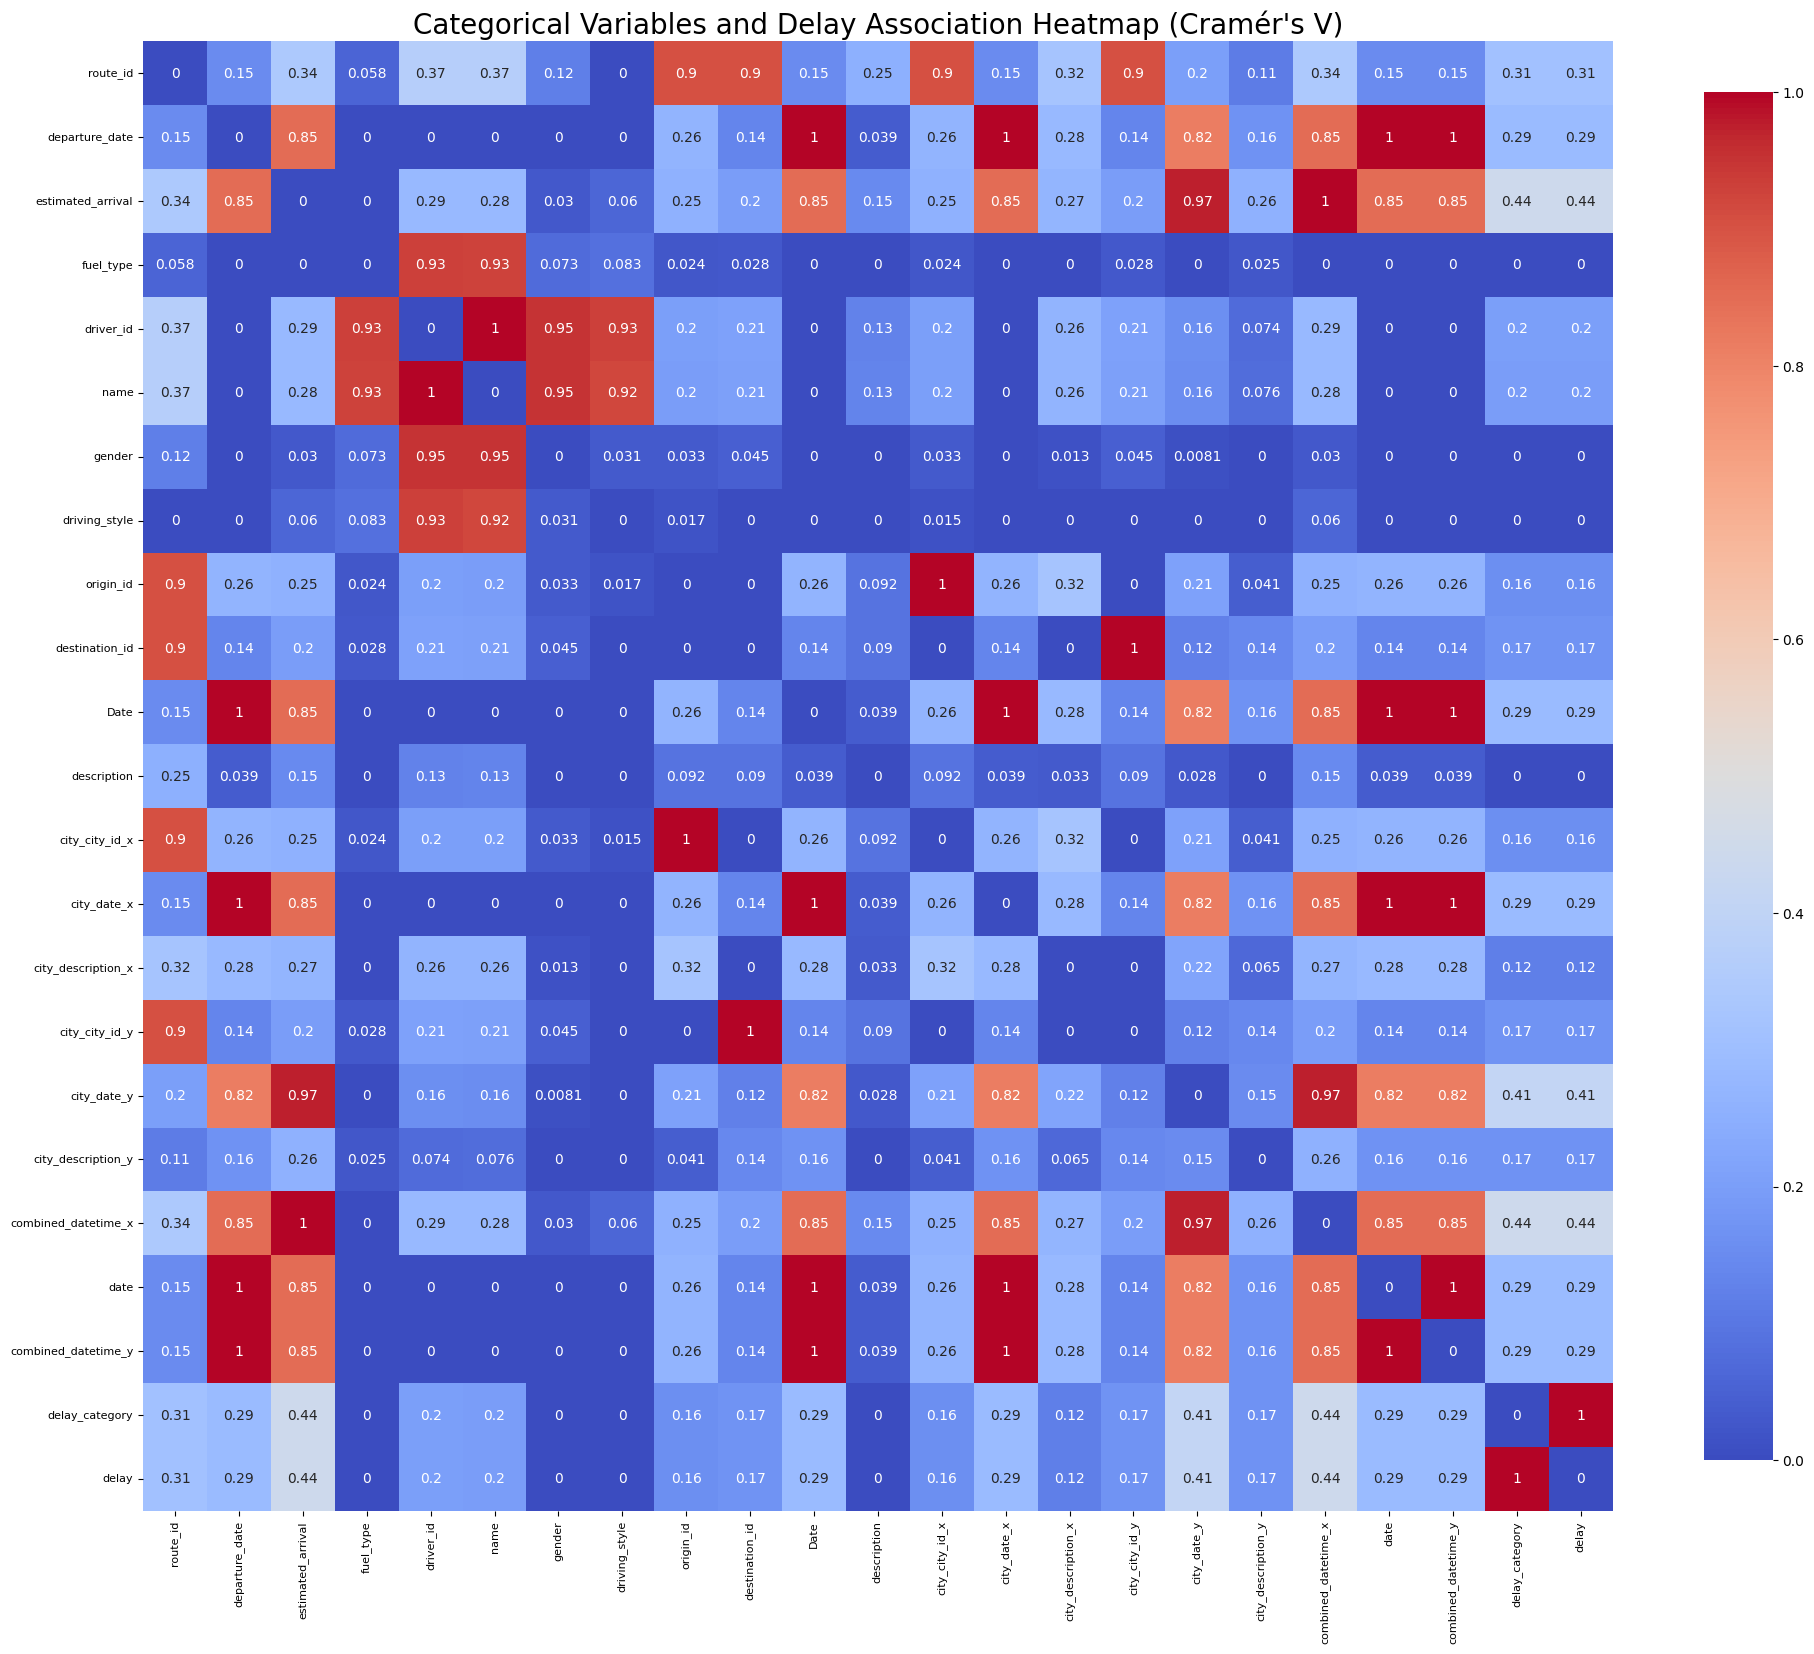

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Assuming 'df' is your DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Add 'delay' to the list of categorical columns
categorical_columns.append('delay')

# Create the association matrix
n = len(categorical_columns)
assoc_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            assoc_matrix[i, j] = cramers_v(df[categorical_columns[i]], df[categorical_columns[j]])

# Create a DataFrame from the association matrix
assoc_df = pd.DataFrame(assoc_matrix, index=categorical_columns, columns=categorical_columns)

# Create the heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(assoc_df, annot=True, cmap='coolwarm', vmin=0, vmax=1, square=True, cbar_kws={"shrink": .8})
plt.title('Categorical Variables and Delay Association Heatmap (Cramér\'s V)', fontsize=20)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


In [11]:

# Assuming 'df' is your DataFrame
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate correlations with 'delay'
correlations = [df[column].corr(df['delay']) for column in numerical_columns]

# Create a Series from the correlations list
correlations_series = pd.Series(correlations, index=numerical_columns)

# Sort correlations by absolute value in descending order
sorted_correlations = correlations_series.abs().sort_values(ascending=False)

# Print the correlations
print("Correlations with 'delay' for numerical variables:")
for column, correlation in sorted_correlations.items():
    print(f"{column}: {correlation:.4f}")


Correlations with 'delay' for numerical variables:
delay: 1.0000
average_hours: 0.2949
distance: 0.2949
city_hour_y: 0.2213
city_visibility_y: 0.1142
city_humidity_y: 0.0906
city_precip_y: 0.0616
city_wind_speed_y: 0.0375
city_wind_speed_x: 0.0345
experience: 0.0202
city_pressure_y: 0.0191
visibility: 0.0187
city_temp_y: 0.0151
age: 0.0148
no_of_vehicles: 0.0141
temp: 0.0123
mileage_mpg: 0.0116
city_temp_x: 0.0108
humidity: 0.0095
average_speed_mph: 0.0092
accident: 0.0090
pressure: 0.0080
precip: 0.0071
city_visibility_x: 0.0068
load_capacity_pounds: 0.0060
city_pressure_x: 0.0059
wind_speed: 0.0051
city_precip_x: 0.0044
truck_age: 0.0043
ratings: 0.0043
city_humidity_x: 0.0041
vehicle_no: 0.0032
truck_id: 0.0032
chanceofrain: nan
chanceoffog: nan
chanceofsnow: nan
chanceofthunder: nan
city_hour_x: nan
city_chanceofrain_x: nan
city_chanceoffog_x: nan
city_chanceofsnow_x: nan
city_chanceofthunder_x: nan
city_chanceofrain_y: nan
city_chanceoffog_y: nan
city_chanceofsnow_y: nan
city_chan

c:\AIML\mlEnv\mlEnv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\AIML\mlEnv\mlEnv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


based on the heatmap: fuel_type, name, gender, driving_style,description have no relation to delay

In [9]:
df3 = df.copy()
df3

,truck_id,route_id,departure_date,estimated_arrival,delay,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,driver_id,...,city_chanceofrain_y,city_chanceoffog_y,city_chanceofsnow_y,city_chanceofthunder_y,combined_datetime_x,date,hour,no_of_vehicles,accident,combined_datetime_y
0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:00:00,0,9.0,3000.0,23.0,diesel,94ed3e6d-f,...,0,0,0,0,2019-01-01 13:00:00,2019-01-01,700,1966.000000,0.0,2019-01-01 07:00:00
1,16793343,R-1a802b07,2019-01-01 07:00:00,2019-01-05 17:00:00,1,10.0,15000.0,27.0,diesel,0257f2f2-c,...,0,0,0,0,2019-01-05 17:00:00,2019-01-01,700,1941.008411,0.0,2019-01-01 07:00:00
2,16301082,R-d377c549,2019-01-01 07:00:00,2019-01-05 23:00:00,0,11.0,20000.0,26.0,diesel,b38a38cb-a,...,0,0,0,0,2019-01-05 23:00:00,2019-01-01,700,1941.008411,0.0,2019-01-01 07:00:00
3,20996187,R-113cebab,2019-01-01 07:00:00,2019-01-05 23:00:00,0,8.0,4000.0,28.0,diesel,ce75c223-e,...,0,0,0,0,2019-01-05 23:00:00,2019-01-01,700,1941.008411,0.0,2019-01-01 07:00:00
4,27204262,R-9f601372,2019-01-01 07:00:00,2019-01-06 21:00:00,0,12.0,15000.0,23.0,diesel,f763b55e-0,...,0,0,0,0,2019-01-06 21:00:00,2019-01-01,700,1941.008411,0.0,2019-01-01 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12602,16311717,R-0800a595,2019-02-12 07:00:00,2019-02-13 06:00:00,0,8.0,3000.0,24.0,diesel,664895ce-d,...,0,0,0,0,2019-02-13 06:00:00,2019-02-12,700,1999.000000,0.0,2019-02-12 07:00:00
12603,20724268,R-3dac8163,2019-02-12 07:00:00,2019-02-12 21:00:00,1,8.0,15000.0,24.0,diesel,1fc1302f-9,...,0,0,0,0,2019-02-12 21:00:00,2019-02-12,700,1999.000000,0.0,2019-02-12 07:00:00
12604,21928760,R-5f7269e5,2019-02-12 07:00:00,2019-02-12 15:00:00,0,13.0,6000.0,17.0,gas,87a34a65-1,...,0,0,0,0,2019-02-12 15:00:00,2019-02-12,700,1999.000000,0.0,2019-02-12 07:00:00
12605,29839726,R-bfbffabd,2019-02-12 07:00:00,2019-02-12 09:00:00,0,10.0,20000.0,16.0,gas,163a3367-9,...,0,0,0,0,2019-02-12 09:00:00,2019-02-12,700,1999.000000,0.0,2019-02-12 07:00:00


In [10]:
df3 = df3.drop(columns=df2.columns)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12607 entries, 0 to 12606
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   route_id             12607 non-null  object
 1   departure_date       12607 non-null  object
 2   estimated_arrival    12607 non-null  object
 3   fuel_type            12607 non-null  object
 4   driver_id            12607 non-null  object
 5   name                 12607 non-null  object
 6   gender               12607 non-null  object
 7   driving_style        12607 non-null  object
 8   origin_id            12607 non-null  object
 9   destination_id       12607 non-null  object
 10  Date                 12607 non-null  object
 11  description          12607 non-null  object
 12  city_city_id_x       12607 non-null  object
 13  city_date_x          12607 non-null  object
 14  city_description_x   12607 non-null  object
 15  city_city_id_y       12607 non-null  object
 16  city

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'df3' is already loaded and you want to apply transformations to object columns
# Identify object columns
object_columns = df3.select_dtypes(include='object').columns

# Separate object columns for OneHotEncoding and LabelEncoding
onehot_columns = object_columns  # Apply OneHotEncoder to all object columns, you can specify specific ones
label_columns = []  # If you have specific columns you want to apply LabelEncoder, list them here

# Create a column transformer for OneHotEncoding and LabelEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_columns),  # OneHotEncode all object columns
        # ('label', LabelEncoder(), label_columns)  # Uncomment this if you want to apply LabelEncoder to specific columns
    ])

# Select features and target
X = df3.drop(columns=['delay'])  # Assuming 'delay' is the target column
y = df3['delay']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Feature importance from the trained model
importances = pd.DataFrame({'Feature': X.columns, 'Importance': pipeline.named_steps['model'].feature_importances_})
importances_sorted = importances.sort_values(by="Importance", ascending=False)

# Print the sorted feature importance
print(importances_sorted)


In [74]:
df.head()

,truck_id,delay,truck_age,load_capacity_pounds,mileage_mpg,age,experience,ratings,vehicle_no,average_speed_mph,...,city_description_y_Patchy light rain,city_description_y_Patchy light rain with thunder,city_description_y_Patchy light snow,city_description_y_Patchy moderate snow,city_description_y_Patchy rain possible,city_description_y_Patchy sleet possible,city_description_y_Patchy snow possible,city_description_y_Sunny,city_description_y_Thundery outbreaks possible,city_description_y_Torrential rain shower
0,30312694,0,-0.251042,-1.006178,0.617076,48.0,9.0,7.0,30312694,57.36,...,False,False,False,False,False,False,False,False,False,False
1,16793343,1,0.251230,1.177507,1.713820,45.0,8.0,3.0,16793343,60.05,...,False,False,False,False,False,False,False,False,False,False
2,16301082,0,0.753502,2.087375,1.439634,50.0,7.0,8.0,16301082,60.50,...,False,False,False,False,False,False,False,False,False,False
3,20996187,0,-0.753314,-0.824204,1.988006,53.0,22.0,9.0,20996187,63.94,...,False,False,False,False,False,False,False,False,False,False
4,27204262,0,1.255774,1.177507,0.617076,52.0,18.0,7.0,27204262,56.28,...,False,False,False,False,False,False,False,False,False,False


In [75]:
df.to_csv("model_Data.csv",index=False)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Check cardinality and reduce categories if necessary
threshold = 10  # Group categories with <10 occurrences
for col in object_columns:
    freq = df3[col].value_counts()
    rare_categories = freq[freq < threshold].index
    df3[col] = df3[col].replace(rare_categories, 'Other')

# Define preprocessor with sparse matrices
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=True), onehot_columns)
    ])

# Split data
X = df3.drop(columns=['delay'])
y = df3['delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline with parallel processing
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# Train the model
pipeline.fit(X_train, y_train)


In [53]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12607 entries, 0 to 12606
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   route_id             12607 non-null  object
 1   departure_date       12607 non-null  object
 2   estimated_arrival    12607 non-null  object
 3   fuel_type            12607 non-null  object
 4   driver_id            12607 non-null  object
 5   name                 12607 non-null  object
 6   gender               12607 non-null  object
 7   driving_style        12607 non-null  object
 8   origin_id            12607 non-null  object
 9   destination_id       12607 non-null  object
 10  Date                 12607 non-null  object
 11  description          12607 non-null  object
 12  city_city_id_x       12607 non-null  object
 13  city_date_x          12607 non-null  object
 14  city_description_x   12607 non-null  object
 15  city_city_id_y       12607 non-null  object
 16  city

In [52]:
df['departure_date']

0       2019-01-01 07:00:00
1       2019-01-01 07:00:00
2       2019-01-01 07:00:00
3       2019-01-01 07:00:00
4       2019-01-01 07:00:00
                ...        
12602   2019-02-12 07:00:00
12603   2019-02-12 07:00:00
12604   2019-02-12 07:00:00
12605   2019-02-12 07:00:00
12606   2019-02-12 07:00:00
Name: departure_date, Length: 12607, dtype: datetime64[ns]

In [40]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-01
4       2019-01-01
           ...    
12602   2019-02-12
12603   2019-02-12
12604   2019-02-12
12605   2019-02-12
12606   2019-02-12
Name: date, Length: 12607, dtype: datetime64[ns]

In [ ]:
df['day_of_week'] = df['date'].dt.day_name()
df['day_of_week']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['day_of_week'], prefix='day', drop_first=False)

# Identify the one-hot encoded columns
day_columns = [col for col in df.columns if col.startswith('day_')]

# Convert all one-hot encoded columns to integers
df[day_columns] = df[day_columns].astype(int)

# Optional: Verify the result
print(df[day_columns].head())



In [56]:
df['estimated_arrival'] = pd.to_datetime(df['estimated_arrival'])

In [ ]:
#Converts all columns with 'date' in their name to datetime format
date_columns = [col for col in df.columns if 'date' in col.lower()]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce') 

#One-hot encode the day of the week for each datetime column
for col in date_columns:
    if col in df.columns:
        df[f'{col}_day_of_week'] = df[col].dt.dayofweek  # 0 = Monday, 6 = Sunday
        day_of_week_encoded = pd.get_dummies(df[f'{col}_day_of_week'], prefix=f'{col}_day')
        df = pd.concat([df, day_of_week_encoded], axis=1)
        df.drop(columns=[f'{col}_day_of_week'], inplace=True)  # Drop original day_of_week column

print(df.head(1))


In [ ]:
# Step 3: Calculate time difference in hours between departure_date and estimated_arrival
if 'departure_date' in df.columns and 'estimated_arrival' in df.columns:
    df['travel_time_hours'] = (df['estimated_arrival'] - df['departure_date']).dt.total_seconds() / 3600

In [59]:
# Step 4: Encode categorical columns for the model
categorical_columns = [
    'route_id', 'fuel_type', 'driver_id', 'name', 'gender', 
    'driving_style', 'origin_id', 'destination_id', 
    'description', 'city_city_id_x', 'city_description_x', 
    'city_city_id_y', 'city_description_y'
]

# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [58]:
# Step 5: Drop unnecessary columns (optional)
columns_to_drop = ['departure_date', 'estimated_arrival', 'combined_datetime_x', 'combined_datetime_y']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)


In [29]:
df['departure_date']


0       2019-01-01 07:00:00
1       2019-01-01 07:00:00
2       2019-01-01 07:00:00
3       2019-01-01 07:00:00
4       2019-01-01 07:00:00
                ...        
12602   2019-02-12 07:00:00
12603   2019-02-12 07:00:00
12604   2019-02-12 07:00:00
12605   2019-02-12 07:00:00
12606   2019-02-12 07:00:00
Name: departure_date, Length: 12607, dtype: datetime64[ns]

In [35]:
# Example workflow for feature engineering
df['departure_date'] = pd.to_datetime(df['departure_date'])

df['day_of_week'] = df['departure_date'].dt.dayofweek

print(df['day_of_week'])


0        1
1        1
2        1
3        1
4        1
        ..
12602    1
12603    1
12604    1
12605    1
12606    1
Name: day_of_week, Length: 12607, dtype: int32


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = [ 'truck_age', 'mileage_mpg', 'load_capacity_pounds'] # add 'travel_time_hours',
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df[numerical_features]

,truck_age,mileage_mpg,load_capacity_pounds
0,-0.251042,0.617076,-1.006178
1,0.251230,1.713820,1.177507
2,0.753502,1.439634,2.087375
3,-0.753314,1.988006,-0.824204
4,1.255774,0.617076,1.177507
...,...,...,...
12602,-0.753314,0.891262,-1.006178
12603,-0.753314,0.891262,1.177507
12604,1.758046,-1.028040,-0.460257
12605,0.251230,-1.302226,2.087375


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X = df.drop(columns=['delay'])  # Features
y = df['delay']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
